# Distribution pseudo random numbers generators tests

QueueSim defines random number generators for some distributions. To test these generators, random numbers are generated and plotted as histograms.

## Importing modules

In [1]:
import math
from typing import Union, Callable

# Plotting modules
import matplotlib.pyplot as plt
import matplotlib.ticker as formater

# Generating pseudo random numbers
import queuesim.random_dist as rnd

# Recording statistics
from queuesim.statistics import RecordDiscrete

# Defining general plot style
plt.style.use('seaborn-v0_8')

In [2]:
# Optional: Interactive diagram mode
# Run "pip install ipympl" first
# %matplotlib ipympl

## Helper function for generating random numbers and showing the results of the tests

In [3]:
def generate_random_numbers(generator : Union[str, Callable[[], float]]) -> RecordDiscrete:
    if isinstance(generator, str):
        generator_func = eval(generator)
    else:
        generator_func = generator

    statistics = RecordDiscrete()
    for i in range(1_000_000):
        statistics.record(generator_func())
    return statistics


def show_results(mean: float, sd: float, statistics: RecordDiscrete) -> None:
    print("Defined mean = ", mean, sep="")
    print("Defined standard deviation = ", sd, sep="")
    print("Generated random numbers:", statistics.count)
    print("Actual mean = ", round(statistics.mean, 2), " (relative deviation: ", round(abs(statistics.mean - mean) / mean * 100, 2), "%)", sep="")
    if sd > 0:
        print("Actual standard deviation = ", round(statistics.sd, 2), " (relative deviation: ", round(abs(statistics.sd - sd) / sd * 100, 2), "%)", sep="")
    else:
        print("Actual standard deviation = ", round(statistics.sd, 2), " (absolute deviation: ", round(abs(statistics.sd - sd), 2), ")", sep="")


def plot_results(statistics: RecordDiscrete, name: str) -> None:
    hist_y_sum = sum(statistics.histogram)
    hist_y = statistics.histogram
    hist_x = [i * statistics.histogram_stepwide for i in range(len(hist_y))]

    fig, ax = plt.subplots(figsize=(16, 9))
    ax.bar(hist_x, hist_y, width=statistics.histogram_stepwide * 0.75)
    ax.yaxis.set_major_formatter(formater.PercentFormatter(xmax=hist_y_sum, decimals=1))
    ax.set_title("Frequency distribution of the generated pseudo random numbers (" + name + ")")

## Deterministic

Defined mean = 100
Defined standard deviation = 0
Generated random numbers: 1000000
Actual mean = 100.0 (relative deviation: 0.0%)
Actual standard deviation = 0.0 (absolute deviation: 0.0)


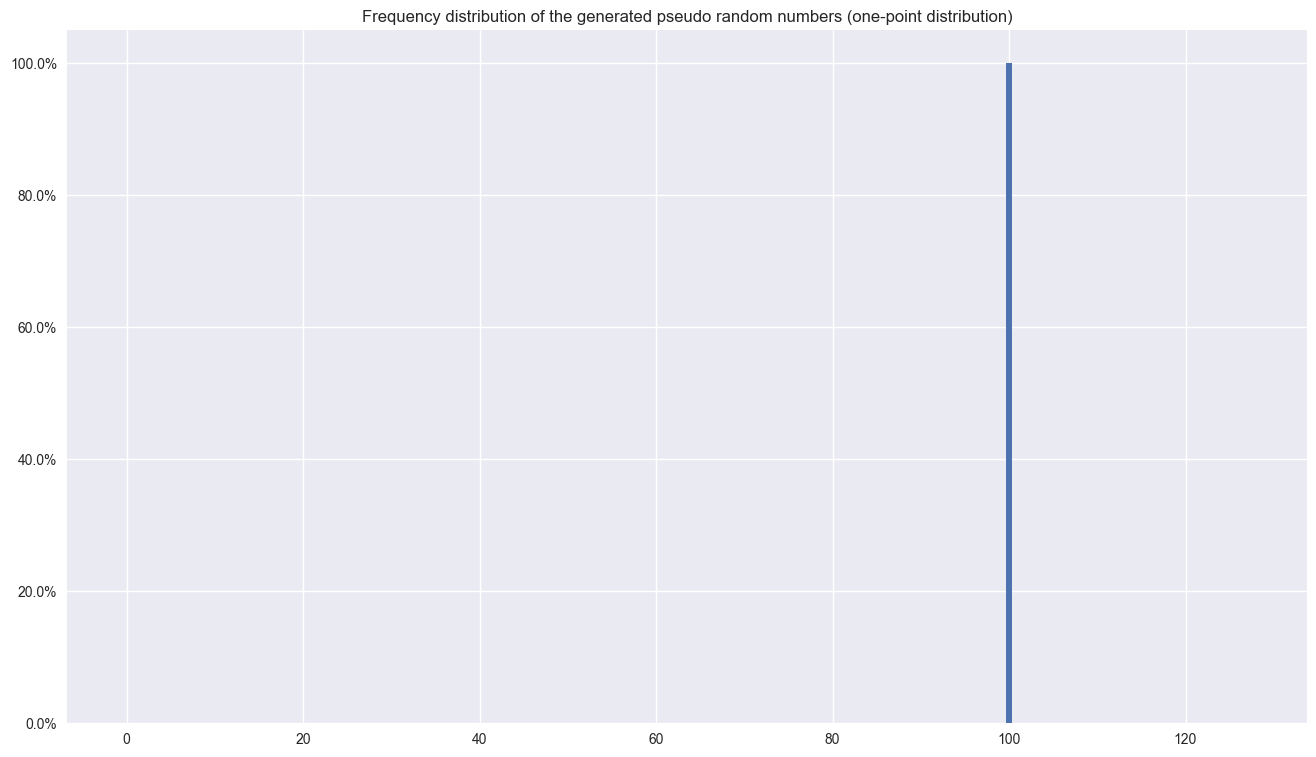

In [4]:
mean = 100

generator = rnd.deterministic(mean, as_lambda=True)
statistics = generate_random_numbers(generator)

show_results(mean, 0, statistics)  # Deterministic: standard deviation = 0
plot_results(statistics, "one-point distribution")

## Exponential distribution

Defined mean = 100
Defined standard deviation = 100
Generated random numbers: 1000000
Actual mean = 99.98 (relative deviation: 0.02%)
Actual standard deviation = 100.01 (relative deviation: 0.01%)


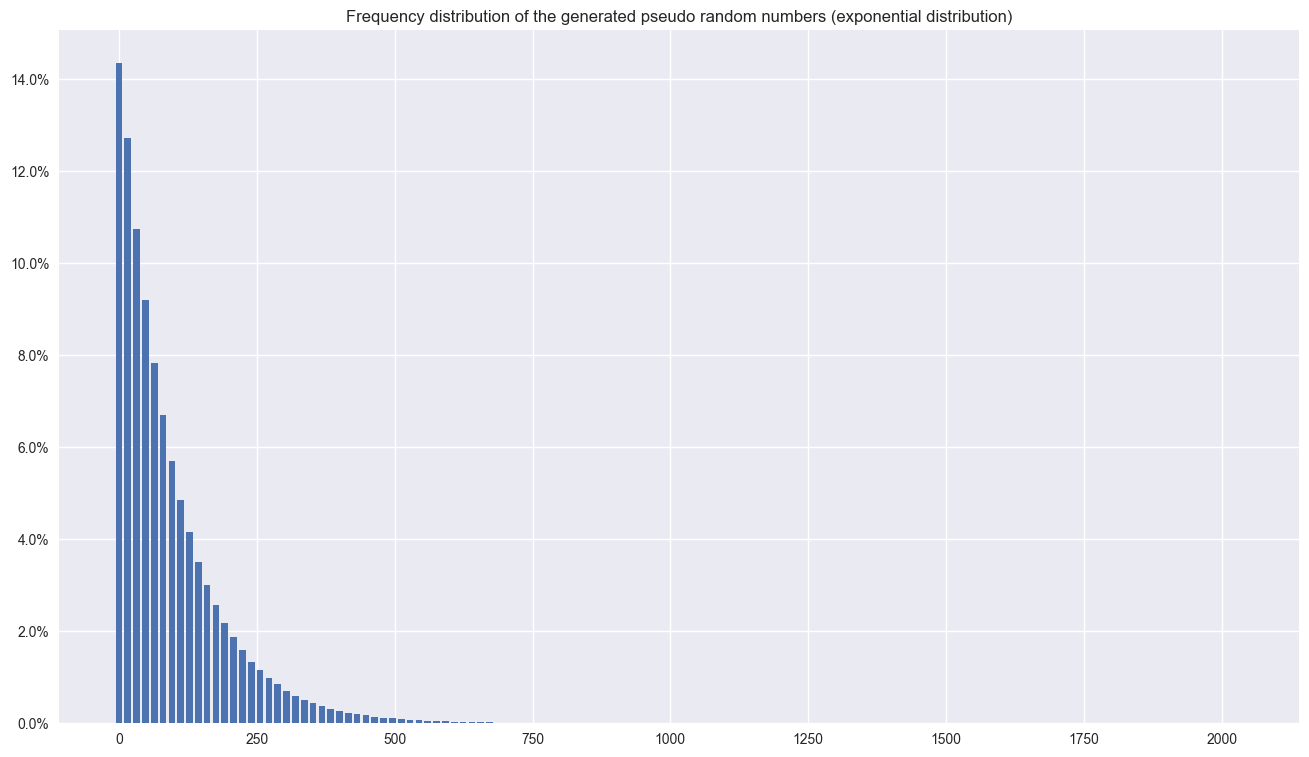

In [5]:
mean = 100

generator = rnd.exp(mean, as_lambda=True)
statistics = generate_random_numbers(generator)

show_results(mean, mean, statistics)  # Exponential distribution: mean = standard deviation
plot_results(statistics, "exponential distribution")

## Log-normal distribution

Defined mean = 100
Defined standard deviation = 40
Generated random numbers: 1000000
Actual mean = 100.01 (relative deviation: 0.01%)
Actual standard deviation = 40.01 (relative deviation: 0.03%)


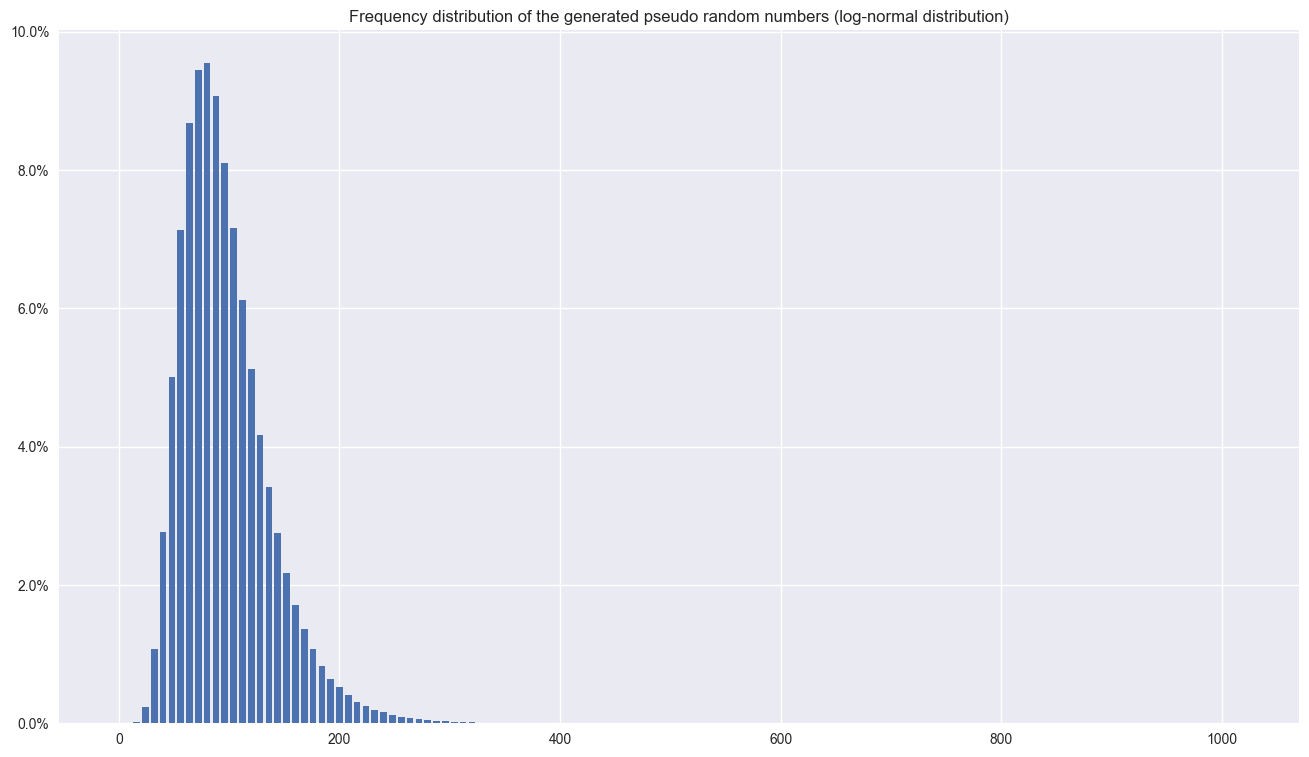

In [6]:
mean = 100
sd = 40

generator = rnd.log_normal(mean, sd, as_lambda=True)
statistics = generate_random_numbers(generator)

show_results(mean, sd, statistics)
plot_results(statistics, "log-normal distribution")

## Gamma distribution

Defined mean = 100
Defined standard deviation = 40
Generated random numbers: 1000000
Actual mean = 99.97 (relative deviation: 0.03%)
Actual standard deviation = 39.98 (relative deviation: 0.06%)


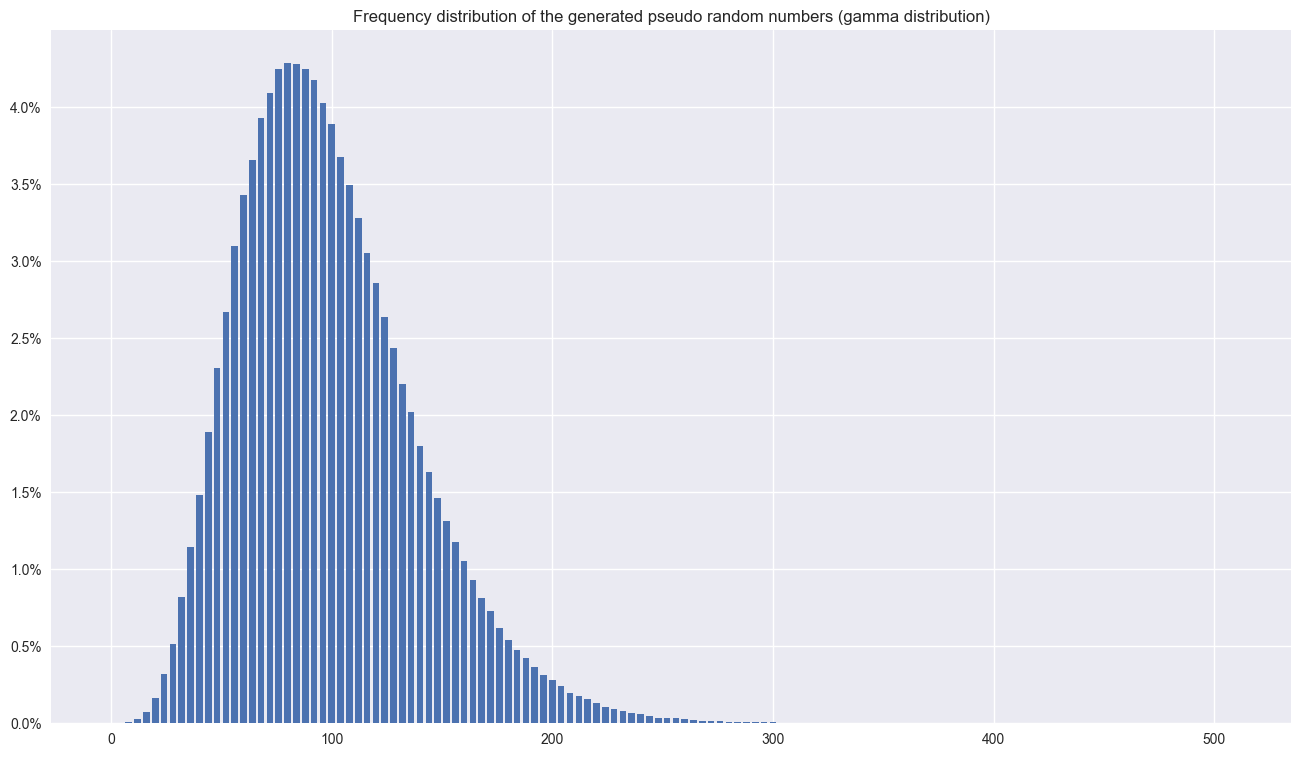

In [7]:
mean = 100
sd = 40

generator = rnd.gamma(mean, sd, as_lambda=True)
statistics = generate_random_numbers(generator)

show_results(mean, sd, statistics)
plot_results(statistics, "gamma distribution")

## Triangular distribution

Defined mean = 66.66666666666667
Defined standard deviation = 16.99673171197595
Generated random numbers: 1000000
Actual mean = 66.67 (relative deviation: 0.01%)
Actual standard deviation = 16.99 (relative deviation: 0.05%)


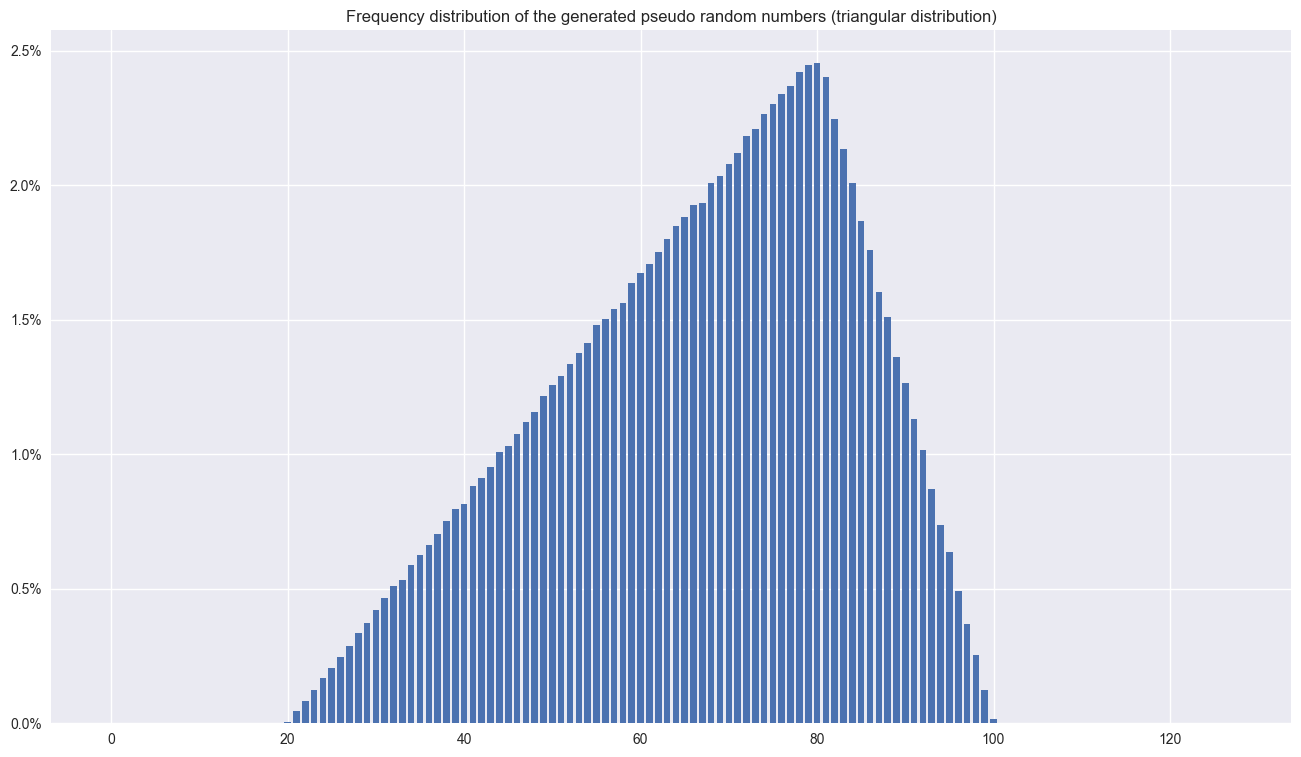

In [8]:
low = 20
high = 100
most_likely = 80

mean = (low + most_likely + high) / 3
sd = math.sqrt((high - low)**2 + (high - most_likely)**2 + (most_likely - low)**2) / 6

generator = rnd.triangular(low, most_likely, high, as_lambda=True)
statistics = generate_random_numbers(generator)

show_results(mean, sd, statistics)
plot_results(statistics, "triangular distribution")

## Uniform distribution

Defined mean = 60.0
Defined standard deviation = 23.094010767585033
Generated random numbers: 1000000
Actual mean = 60.0 (relative deviation: 0.0%)
Actual standard deviation = 23.1 (relative deviation: 0.02%)


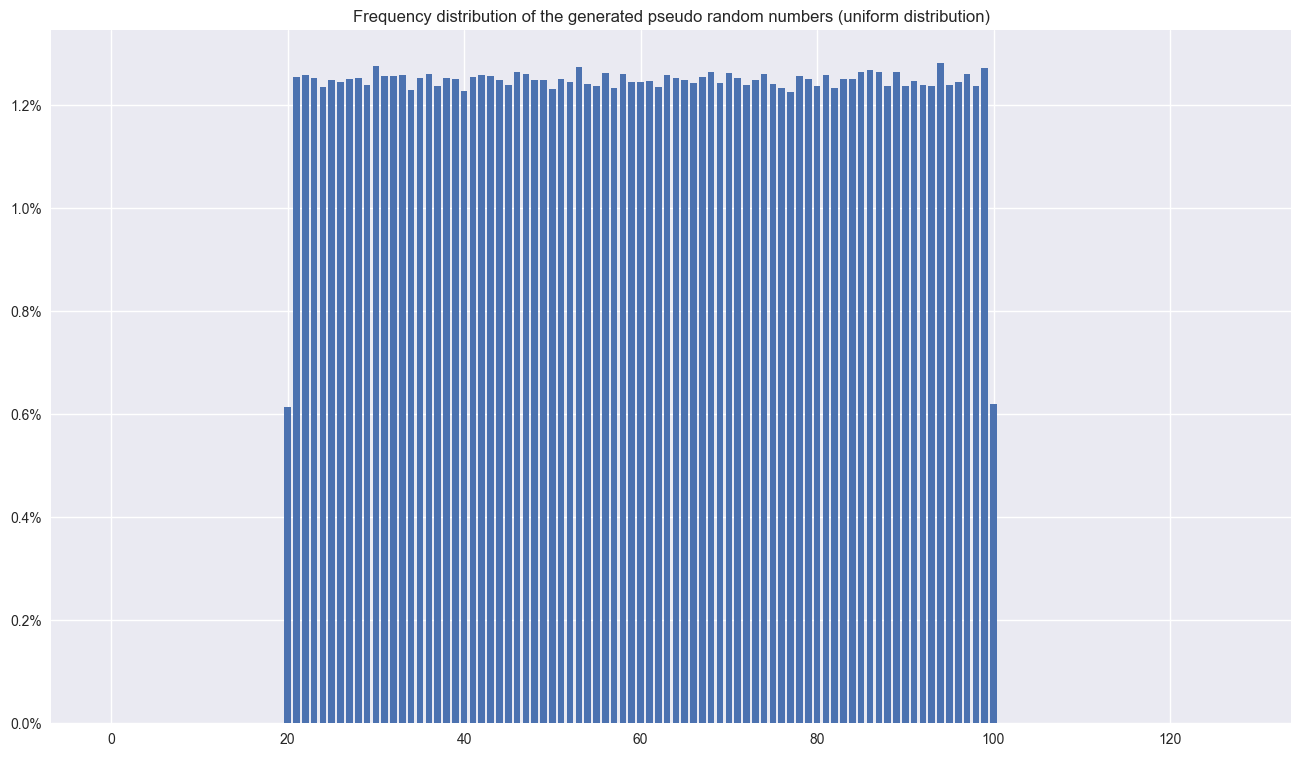

In [9]:
low = 20
high = 100
mean = (low + high) / 2
sd = (high - low) / math.sqrt(12)

generator = rnd.uniform(low, high, as_lambda=True)
statistics = generate_random_numbers(generator)

show_results(mean, sd, statistics)
plot_results(statistics, "uniform distribution")

## Empirical values

Defined mean = 30.0
Defined standard deviation = 10.458250331675945
Generated random numbers: 1000000
Actual mean = 29.98 (relative deviation: 0.05%)
Actual standard deviation = 10.38 (relative deviation: 0.76%)


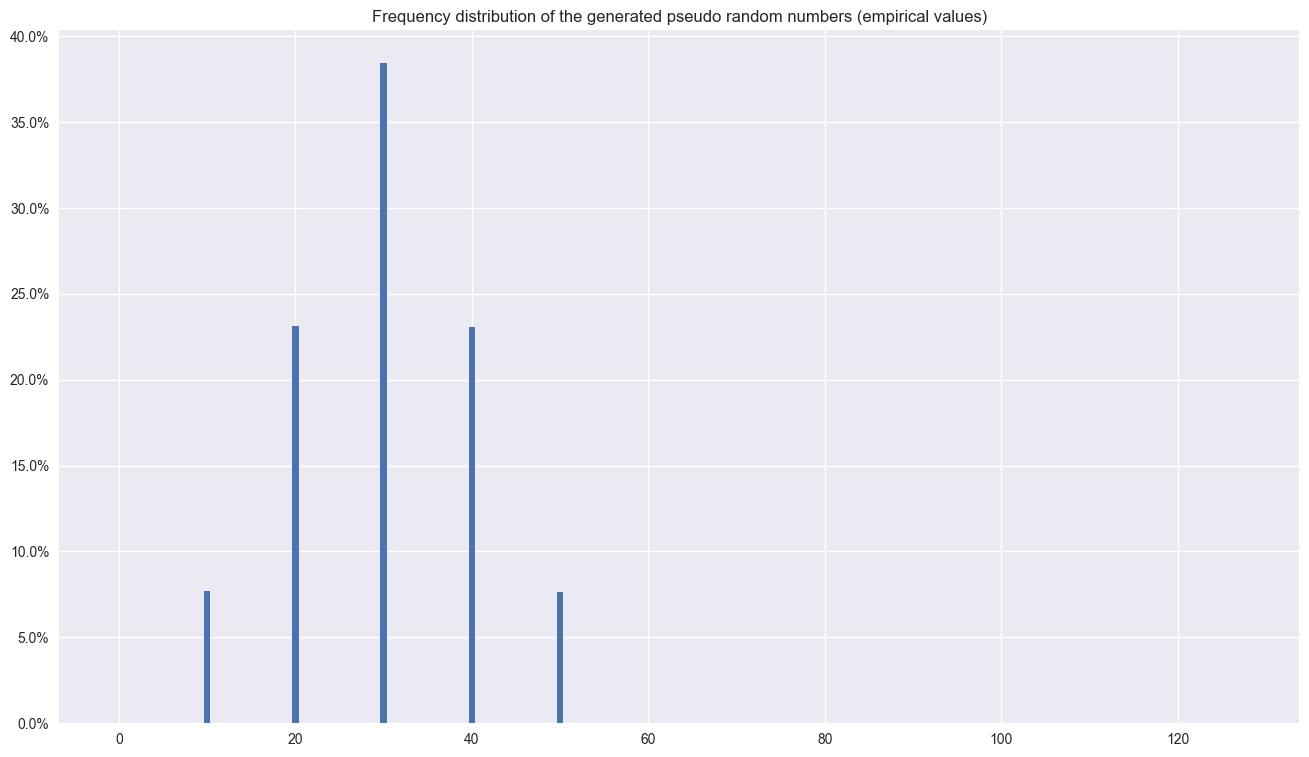

In [10]:
options={10: 5, 20: 15, 30: 25, 40: 15, 50: 5}
generator = rnd.empirical(options, as_lambda=True)
statistics = generate_random_numbers(generator)

statRecord=RecordDiscrete()
for key in options:
    for i in range(0,options[key]): statRecord.record(key)

show_results(statRecord.mean, statRecord.sd, statistics)
plot_results(statistics, "empirical values")